In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     

In [2]:
df = pd.read_csv('data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
# now, check if any missing values is there

df.isnull().mean()*100      

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
# so in above table, we apply CCA only on that column where (no. of missing data < 5 %)

# let's find the column's name first

cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols     

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [6]:
# so, these are the columns where we are going to apply CCA         

# Now, Start doing operation on these columns                 
   
df[cols].sample(5)                          

,city_development_index,enrolled_university,education_level,experience,training_hours
14965,0.910,no_enrollment,Graduate,13.0,102.0
3343,0.895,no_enrollment,Primary School,20.0,300.0
10641,0.920,no_enrollment,Graduate,11.0,98.0
6525,0.920,no_enrollment,High School,3.0,38.0
7339,0.920,no_enrollment,Graduate,2.0,11.0


In [7]:
# here, 'enrolled_university' and 'education_level' --> categorical column only 
# And, rest of them are numerical column
 
# df[cols].dropna() drops all that columns that have any missing values 

len(df[cols].dropna()) / len(df)  # this shows that we have 89% data left only, after dropping columns with missing value

# it's something like, from 100 rows, we have only 89 rows are left and rest are droped/removed. 

0.8968577095730244

In [8]:
# we can also compare it 

new_df = df[cols].dropna()
df.shape, new_df.shape      # we can see changes in the rows

((19158, 13), (17182, 5))

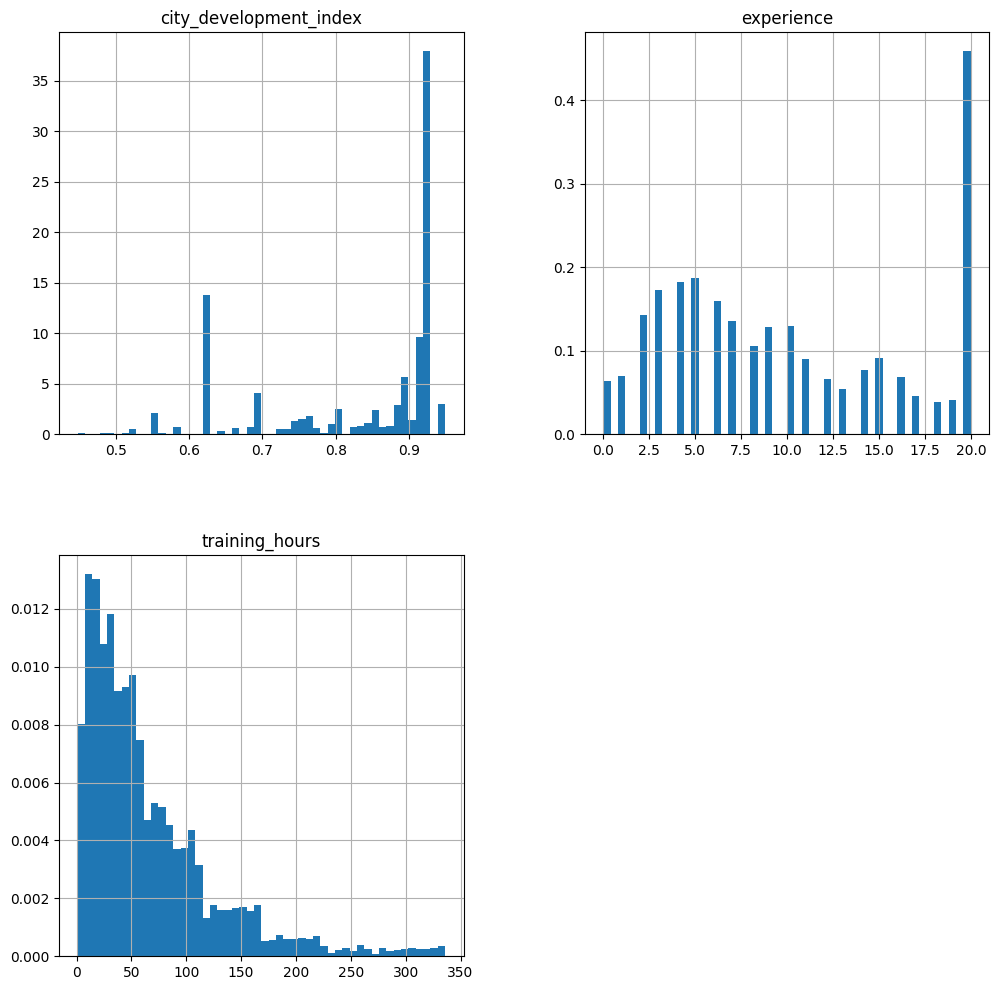

In [9]:
# Exploring histogram after performing CCA (droping the missing values)
 
new_df.hist(bins=50, density=True, figsize=(12,12))
plt.show()

<Axes: >

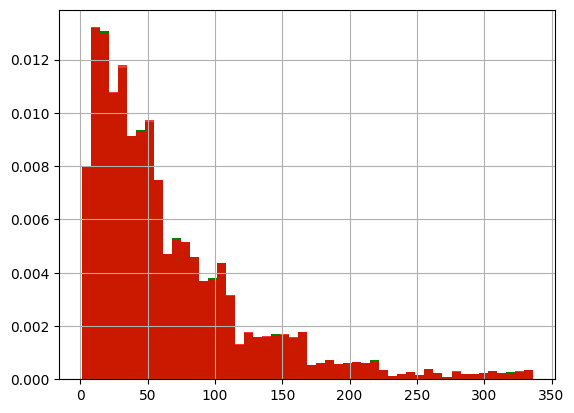

In [10]:
# Using HISTOGRAM for 'training_hours', we can visualize distribution of the data before and after is same approximately.

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='green')

# data after CCA, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions

new_df['training_hours'].hist(bins=50, ax=ax, density=True, color='red', alpha=0.8)

<Axes: ylabel='Density'>

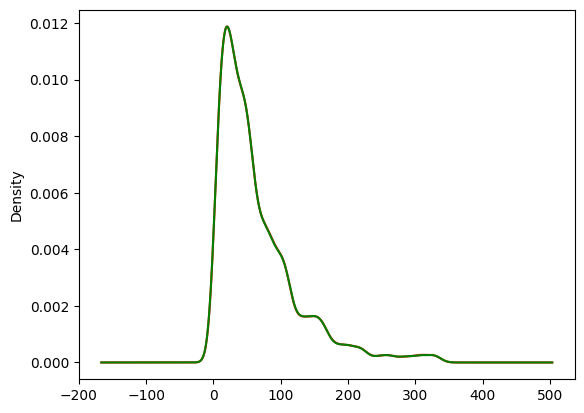

In [11]:
# Now, also visualize it through PDF 

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after doing CCA 
new_df['training_hours'].plot.density(color='green')

# so, red and green line totally overlaps each other, this shows that " jo data missing tha --> that was MCAR(missing completely at random) "

<Axes: >

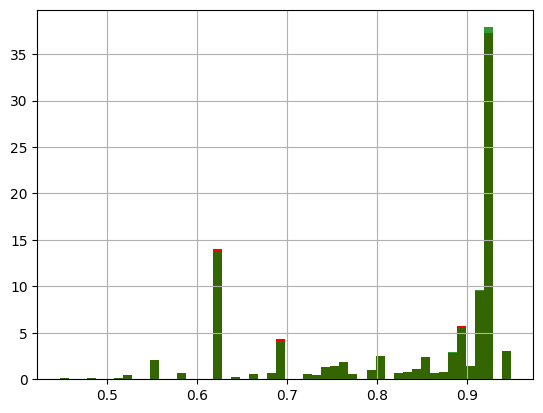

In [12]:
# Now, do the same operation for each rest of the columns 

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after CCA, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions

new_df['city_development_index'].hist(bins=50, ax=ax, density=True, color='green', alpha=0.8)

# so, we can easily say that it is MCAR(missing completely at random)

<Axes: ylabel='Density'>

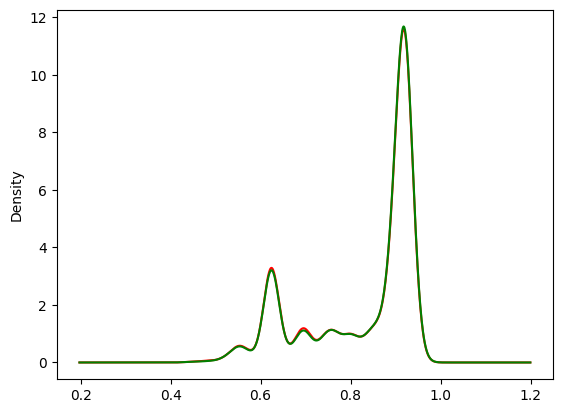

In [13]:
# Now, visulaize it through PDA

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after CCA
new_df['city_development_index'].plot.density(color='green')

<Axes: >

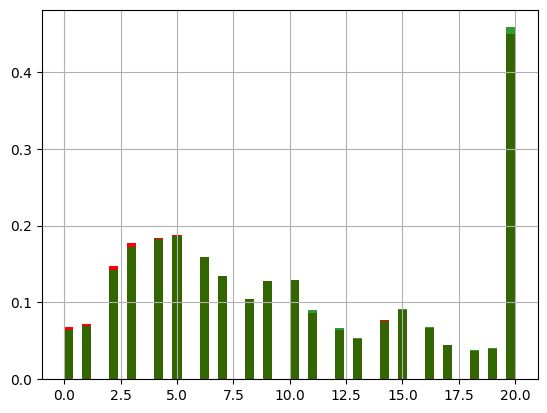

In [14]:
# Now, come to 'experience' column

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions

new_df['experience'].hist(bins=50, ax=ax, density=True, color='green', alpha=0.8)

In [15]:
df['education_level'].value_counts()

# we have to check whatever the ratio of each category before CCA that must be maintain even after the performing CCA.
# mtlb graduate ka jitna ratio hai whi maintain rhna chahiye after CCA, then we can say that it is MCAR(missing completely at random).

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [16]:
# Now, Comparing the ratio for 'enrolled_university' before and after CCA 

temp = pd.concat([
          
          # percentage of observations per category, original data
          df['enrolled_university'].value_counts() / len(df),

          # percentage of observations per category, CCA data
          new_df['enrolled_university'].value_counts() / len(new_df)
       ], 
         axis=1)

# Add column names also 
temp.columns = ['original', 'cca']
temp

# here, it's little change between them(original data & cca data), so, it's OKAY.
# if there will comparatively change happening here b/w them, then it's like a 'RED ALERT' that 'yha CCA krne pr disturbance ho rhi hai'

# In our case, applying CCA is fine. 

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [17]:
# Now, look for another case i.e., for 'education_level' column

temp = pd.concat([

       # percentage of observations per category, original data
       df['education_level'].value_counts() / len(df),

       # percentage of observations per category, cca data
       new_df['education_level'].value_counts() / len(new_df)
    ], 
       axis=1)             
       
# Add column names for this 

temp.columns = ['original', 'cca']
temp 

# so, it's fine in this case to apply CCA. 

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
